# Task3

File size: 194076 bytes
Length of format data: 16
Type of format: 1, (1 - is PCM)
Number of channels: 1
Mono audio
BytesPerSample x Channels: 2
Byte Rate: 88200
Sample rate: 44100
Bits per sample: 16
Data size: 194040 bytes
Bytes per sample: 2
Total samples in the audio file: 97020
Sound duration: 2.2 s


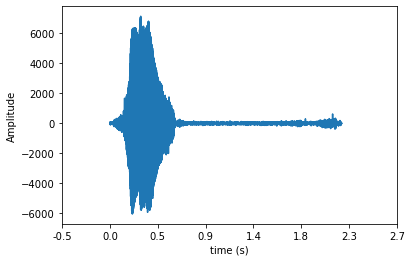


Listen to this sound:



In [1]:
from tkinter import Tk
from tkinter.filedialog import askopenfilename
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

Tk().withdraw()
filename = askopenfilename()
# filename = "/Users/modestasgrazys/Documents/VU/Signal Processing/Samples/mixkit-cartoon-kitty-begging-meow-92.wav"

header_bytes = []

with open(filename, 'rb') as input_file:
    riff = input_file.read(4)
    file_size = int.from_bytes(input_file.read(4), "little")
    file_type_header_wave = input_file.read(4)
    format_chunk_marker = input_file.read(4)
    length_of_format_data = int.from_bytes(input_file.read(4), "little")
    type_of_format = int.from_bytes(input_file.read(2), "little")
    number_of_channels = int.from_bytes(input_file.read(2), "little")
    sample_rate = int.from_bytes(input_file.read(4), "little")
    byte_rate = int.from_bytes(input_file.read(4), "little")
    bytes_per_sample_channels = int.from_bytes(input_file.read(2), "little")
    bits_per_sample = int.from_bytes(input_file.read(2), "little")
    data_header = input_file.read(4)
    data_size = int.from_bytes(input_file.read(4), "little")
    
    print(f'File size: {file_size} bytes')
    print(f'Length of format data: {length_of_format_data}')
    print(f'Type of format: {type_of_format}, (1 - is PCM)')
    print(f'Number of channels: {number_of_channels}')
    if number_of_channels == 1:
        print(f'Mono audio')
    elif number_of_channels == 2:
        print(f'Stereo audio')
    else:
        raise Exception("This number of channels is unsopported")
    print(f'BytesPerSample x Channels: {bytes_per_sample_channels}')
    print(f'Byte Rate: {byte_rate}')
    print(f'Sample rate: {sample_rate}')
    print(f'Bits per sample: {bits_per_sample}')
    if data_size > file_size:
        data_size = file_size - 8
    print(f'Data size: {data_size} bytes')
    
    sample_in_bytes = input_file.read(data_size)
    
    bytes_per_sample = int(bits_per_sample / 8)

total_samples = int(data_size / (bytes_per_sample * number_of_channels))
sound_duration = total_samples / sample_rate


samples = []

if number_of_channels == 1:
    for i in range(total_samples):
        sample = int.from_bytes(sample_in_bytes[bytes_per_sample*i:bytes_per_sample*(i+1)], "little", signed=True)
        samples.append(sample)
elif number_of_channels == 2:
    for i in range(total_samples*number_of_channels):
        sample1 = int.from_bytes(sample_in_bytes[bytes_per_sample*i:bytes_per_sample*(i+1)], "little", signed=True)
        sample2 = int.from_bytes(sample_in_bytes[bytes_per_sample*(i+2):bytes_per_sample*(i+3)], "little", signed=True)
        samples.append((sample1, sample2))
else:
    raise Exception("More than 2 channel audio files unsupported")


print(f'Bytes per sample: {bytes_per_sample}')
print(f'Total samples in the audio file: {total_samples}')
print(f'Sound duration: {sound_duration} s')

# Set marker position in the sound diagram. Please mind the duration of a sound
# marker_position = 0.7

# marker_position = marker_position * sample_rate

def plot_sound_time_diagram(samples, number_of_channels):
    if number_of_channels == 1:
        samples = np.array(samples)
        time_axis = np.arange(0, len(samples))
        plt.plot(time_axis, samples)
        # plt.plot(marker_position, 0, marker="P", markersize=15)
    elif number_of_channels == 2:
        channel1_samples = [channel1_sample for (channel1_sample, channel2_sample) in samples]
        channel2_samples = [channel2_sample for (channel1_sample, channel2_sample) in samples]
        time_axis = np.arange(0, len(samples))
        fig, ax = plt.subplots(2, 1, sharex='col', sharey='row')
        ax[0].plot(time_axis, channel1_samples)
        # ax[0].plot(marker_position, 0, marker="P", markersize=15)
        ax[1].plot(time_axis, channel2_samples)
        # ax[1].plot(marker_position, 0, marker="P", markersize=15)
    
    tick_locations, tick_labels = plt.xticks()
    tick_labels = [round(value / sample_rate, 1) for value in tick_locations]
    plt.xticks(ticks=tick_locations, labels=tick_labels)
    plt.xlabel('time (s)')
    plt.ylabel('Amplitude')
    plt.show()

plot_sound_time_diagram(samples, number_of_channels)
print('\nListen to this sound:\n')
ipd.Audio(filename)

Echo effect is created by applying this formula to the sound:

𝒔̃ = 𝒔 + 𝛼 ∙ 𝒔 Δ 


1. 𝒔 - initial sound
2. 𝒔 Δ - delayed initial sound (delta - delay parameter)
3. 𝛼 - delayed sound amplification parameter ( <1 to lower the delayed sound volume)
4. 𝛼 ∙ 𝒔 Δ - echo
5. 𝒔̃ - resulting sound with an generated echo

Offset chosen by 8820 samples
Extended initial sound:


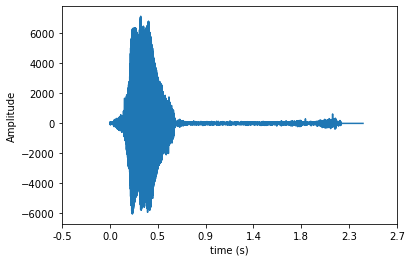

Echo made from the initial sound:


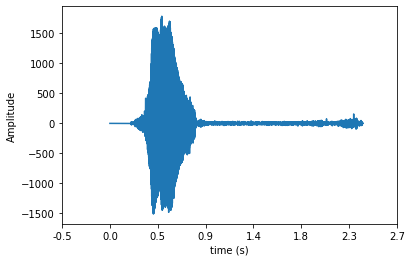

Resulting sound with the applied echo:


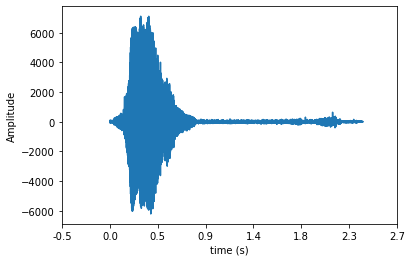


Listen to the sound with echo:



In [3]:
import wave

def assign_echo(samples, sample_rate, number_of_channels, alpha, delta):
    offset = int(sample_rate * delta)
    extension = [0] * offset
    if number_of_channels == 1:
        extended_samples = samples + extension
        echo = extension + samples
        echo = [alpha * value for value in echo]
        samples_echo = zip(extended_samples, echo)
        samples_echo = [int(sample + echo_value) for (sample, echo_value) in samples_echo]
        all_samples = [extended_samples, echo, samples_echo]
    elif number_of_channels == 2:
        channel1_samples = [channel1_sample for (channel1_sample, channel2_sample) in samples]
        channel2_samples = [channel2_sample for (channel1_sample, channel2_sample) in samples]
        extended_channel1_samples = channel1_samples + extension
        extended_channel2_samples = channel2_samples + extension
        channel1_echo = extension + channel1_samples
        channel1_echo = [alpha * value for value in channel1_echo]
        channel2_echo = extension + channel2_samples
        channel2_echo = [alpha * value for value in channel2_echo]
        channel1_samples_echo = [int(sample + echo_value) for (sample, echo_value) in zip(extended_channel1_samples, channel1_echo)]
        channel2_samples_echo = [int(sample + echo_value) for (sample, echo_value) in zip(extended_channel2_samples, channel2_echo)]
        samples_echo = list(zip(channel1_samples_echo, channel2_samples_echo))
        all_samples = [list(zip(extended_channel1_samples, extended_channel2_samples)), list(zip(channel1_echo, channel2_echo)), list(zip(channel1_samples_echo, channel2_samples_echo))]
    else:
        raise Exception("More than 2 channel audio files unsupported")
    print(f'Offset chosen by {offset} samples')
    
    return samples_echo, all_samples

def visualize_samples(samples, number_of_channels):
    print("Extended initial sound:")
    plot_sound_time_diagram(samples[0], number_of_channels)
    print("Echo made from the initial sound:")
    plot_sound_time_diagram(samples[1], number_of_channels)
    print("Resulting sound with the applied echo:")
    plot_sound_time_diagram(samples[2], number_of_channels)
    
# Apply to te code and test audio writing
def write_to_file(filepath, samples, number_of_channels, bytes_per_sample, sample_rate):
    file = wave.open(filepath, 'wb')
    file.setnchannels(number_of_channels)
    file.setsampwidth(bytes_per_sample*number_of_channels)
    file.setframerate(sample_rate)
    file.setnframes(len(samples))
    if number_of_channels == 1:
        output_stream = b''.join([sample.to_bytes(bytes_per_sample, "little", signed=True) for sample in samples])
    elif number_of_channels == 2:
        output_stream = b''.join([b''.join([sample1.to_bytes(bytes_per_sample, "little", signed=True), sample2.to_bytes(bytes_per_sample, "little", signed=True)]) for (sample1, sample2) in samples])
    else:
        raise Exception("More than 2 channel audio files unsupported")
    file.writeframes(output_stream)
    file.close()


echo_samples, all_samples = assign_echo(samples, sample_rate, number_of_channels, alpha=0.25, delta=0.2)
# echo_samples = samples
visualize_samples(all_samples, number_of_channels)

temp_file_location = "../Samples/echo.wav"
# wavfile.write(temp_file_location, sample_rate, np.array(echo_samples).astype(np.int16))
write_to_file(temp_file_location, echo_samples, number_of_channels, bytes_per_sample, sample_rate)
print('\nListen to the sound with echo:\n')
ipd.Audio(temp_file_location)
